# HOUSE PREDICTION MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('housing.csv.csv')
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

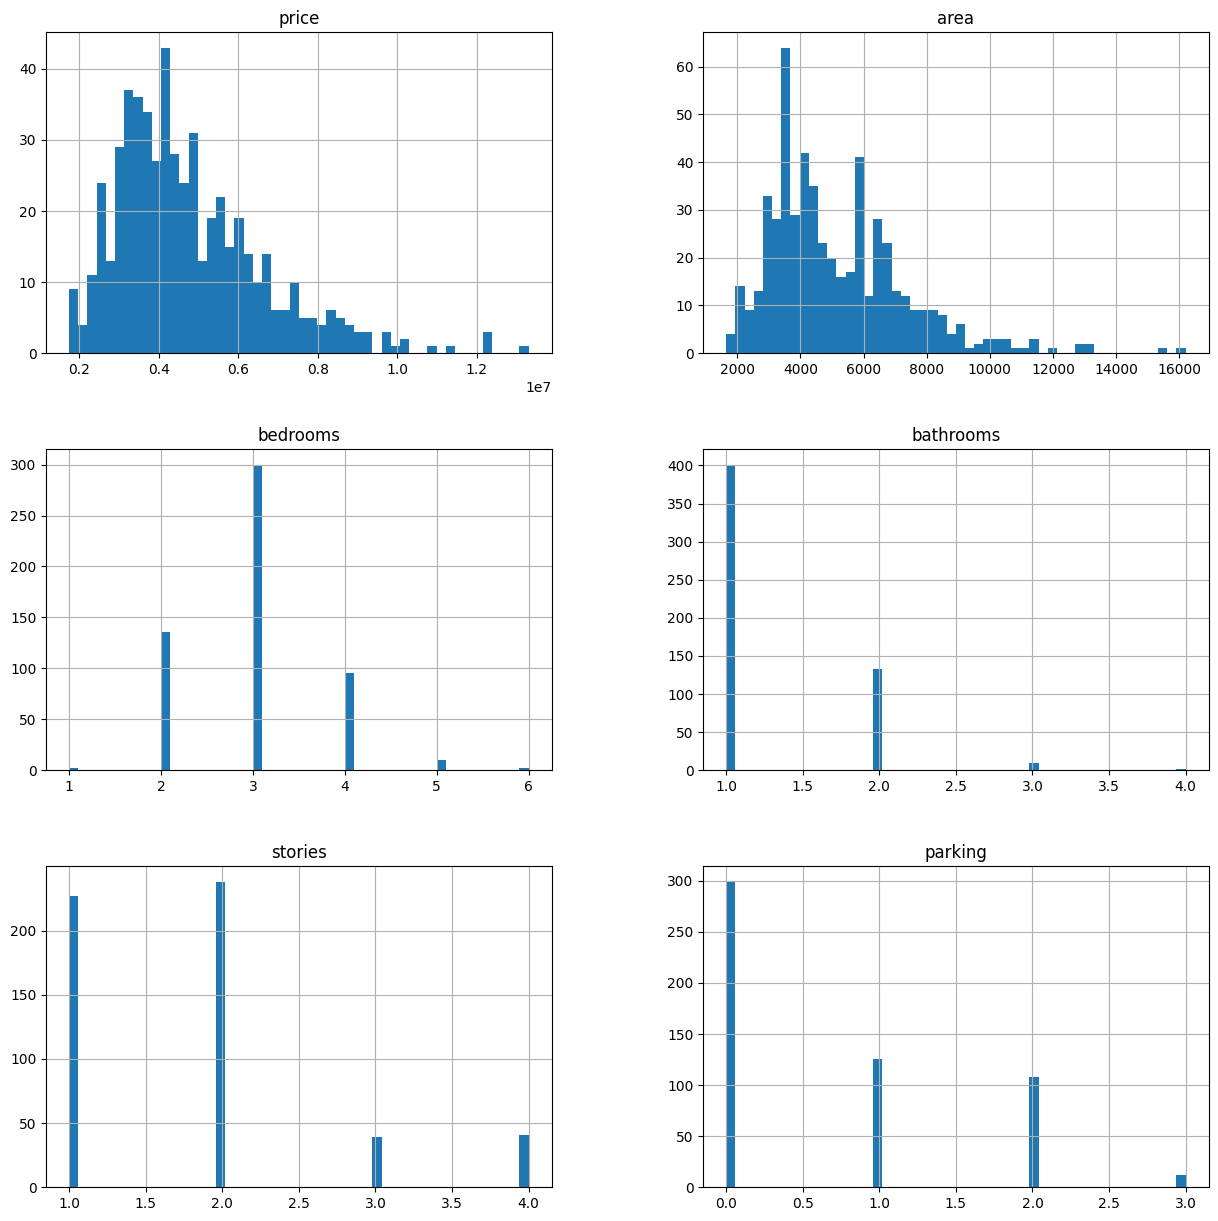

In [3]:
df.hist(bins=50,figsize=(15,15))

In [4]:
print(df['hotwaterheating'])

0      no
1      no
2      no
3      no
4      no
       ..
540    no
541    no
542    no
543    no
544    no
Name: hotwaterheating, Length: 545, dtype: object


In [6]:
print(df['airconditioning'])

0      yes
1      yes
2       no
3      yes
4      yes
      ... 
540     no
541     no
542     no
543     no
544     no
Name: airconditioning, Length: 545, dtype: object


In [7]:

df['airconditioning'] = df['airconditioning'].map({'no': 0, 'yes': 1})
print(df['airconditioning'])

0      1
1      1
2      0
3      1
4      1
      ..
540    0
541    0
542    0
543    0
544    0
Name: airconditioning, Length: 545, dtype: int64


In [8]:

df['prefarea'] = df['prefarea'].map({'no': 0, 'yes': 1})
print(df['prefarea'])

0      1
1      0
2      1
3      1
4      0
      ..
540    0
541    0
542    0
543    0
544    0
Name: prefarea, Length: 545, dtype: int64


In [9]:

df['hotwaterheating'] = df['hotwaterheating'].map({'no': 0, 'yes': 1})
print(df['hotwaterheating'])

0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    0
542    0
543    0
544    0
Name: hotwaterheating, Length: 545, dtype: int64


In [10]:

df['basement'] = df['basement'].map({'no': 0, 'yes': 1})
print(df['basement'])

0      0
1      0
2      1
3      1
4      1
      ..
540    1
541    0
542    0
543    0
544    0
Name: basement, Length: 545, dtype: int64


In [11]:

df['guestroom'] = df['guestroom'].map({'no': 0, 'yes': 1})
print(df['guestroom'])

0      0
1      0
2      0
3      0
4      1
      ..
540    0
541    0
542    0
543    0
544    0
Name: guestroom, Length: 545, dtype: int64


In [12]:

df['mainroad'] = df['mainroad'].map({'no': 0, 'yes': 1})
print(df['mainroad'])

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: int64


# PLOTTING HISTOGRAMS FOR VARIOUS PARAMS

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>],
       [<Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>]], dtype=object)

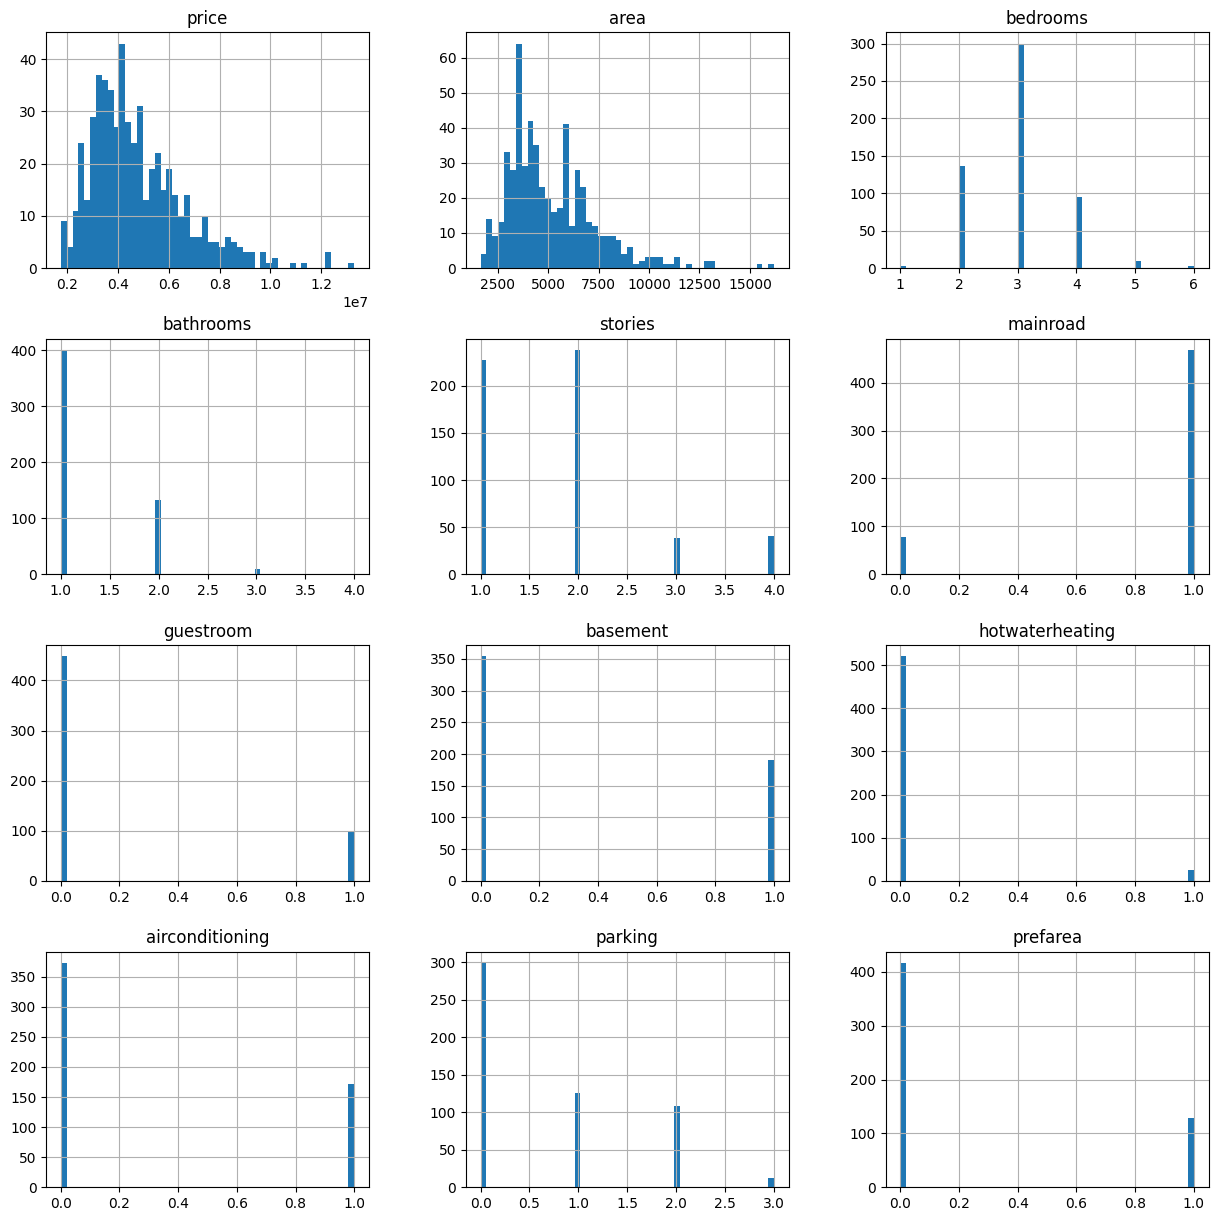

In [13]:
df.hist(bins=50,figsize=(15,15))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [15]:

df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'furnished': 1, 'semi-furnished': 0.5})
print(df['furnishingstatus'])

0      1.0
1      1.0
2      0.5
3      1.0
4      1.0
      ... 
540    0.0
541    0.5
542    0.0
543    1.0
544    0.0
Name: furnishingstatus, Length: 545, dtype: float64


In [21]:
def splittest(data,ratio):
    shuffled=np.random.permutation(len(data))
    size=int(len(data)*ratio)
    test_ind=shuffled[:size]
    train_ind=shuffled[size:]
    return data.iloc[train_ind],data.iloc[test_ind]

In [22]:
trainset,testset=splittest(df,0.4)
print("Train size: ",len(trainset))
print("Test size: ",len(testset))

Train size:  327
Test size:  218


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
corr_matrix=df.corr()

In [25]:
corr_matrix['price']

price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus    0.304721
Name: price, dtype: float64

In [26]:
corr_matrix['area']

price               0.535997
area                1.000000
bedrooms            0.151858
bathrooms           0.193820
stories             0.083996
mainroad            0.288874
guestroom           0.140297
basement            0.047417
hotwaterheating    -0.009229
airconditioning     0.222393
parking             0.352980
prefarea            0.234779
furnishingstatus    0.171445
Name: area, dtype: float64

In [ ]:
corr_matrix['hotwaterheating']
#the values suggests that no factors depend on hotwaterheating whereas previous values show that price is highly correlated to many factors

# SELECTING A MODEL

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
inputs=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]

In [34]:
targets=df['price']

In [35]:
model=LinearRegression()

In [36]:
model.fit(inputs,targets)

LinearRegression()

In [37]:
predictions = model.predict(inputs)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
loss = np.sqrt(mean_squared_error(targets, predictions))
print('Loss:', loss)

Loss: 1056995.064075431


# Testing on data values generated using function splittest via Linear regression

In [40]:
model1=LinearRegression()

In [42]:
inputs1=trainset[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
targets1=trainset['price']

In [44]:
model1.fit(inputs1,targets1)

LinearRegression()

In [45]:
test1=testset[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]

In [65]:
output=model1.predict(test1)

In [66]:
loss = np.sqrt(mean_squared_error(output,testset['price']))
print('Loss:', loss)

Loss: 1072782.78920929


In [63]:
model.predict([[7000,2,2,7,0,0,0,1,0,0,1,0.5]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8485484.53909352])

# Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
model2=DecisionTreeRegressor()

In [69]:
model2.fit(inputs1,targets1)

DecisionTreeRegressor()

In [70]:
output2=model2.predict(test1)

In [71]:
loss = np.sqrt(mean_squared_error(output2,testset['price']))
print('Loss:', loss)

Loss: 1493757.745816929


# Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
model3=RandomForestRegressor()

In [74]:
model3.fit(inputs1,targets1)

RandomForestRegressor()

In [75]:
output3=model3.predict(test1)

In [76]:
loss = np.sqrt(mean_squared_error(output3,testset['price']))
print('Loss:', loss)

Loss: 1115671.116284151


#  KNeighbors Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
model4=KNeighborsClassifier()

In [81]:
model4.fit(inputs1,targets1)
output4=model4.predict(test1)

In [82]:
loss = np.sqrt(mean_squared_error(output4,testset['price']))
print('Loss:', loss)

Loss: 1938228.4281947743
